### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Understanding the dataset -- Checking for the shape, column names and its data type

In [4]:
data.shape

(150, 6)

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# The Species column has been dropped before finding the clustering technique

In [8]:
data1 = data.drop('Species',axis = 1)
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [9]:
# I have used K-Means as well as Agglomerative Clustering technique
# Let's find which technique gives a better result

### Clustering using K-Means

In [10]:
# Find the number of clusters

err = []
for i in range(1,10):
    model = KMeans(i)
    model.fit(data1)
    err.append(model.inertia_)
print("Error Terms:",err)

Error Terms: [281918.32439999987, 70616.29893333331, 31365.589670588226, 17798.00872807018, 11440.794903225811, 7942.141827777772, 5908.709811405988, 4586.711513145607, 3590.6923308823534]


In [11]:
# Line graph plotted between the error terms and the number of clusters

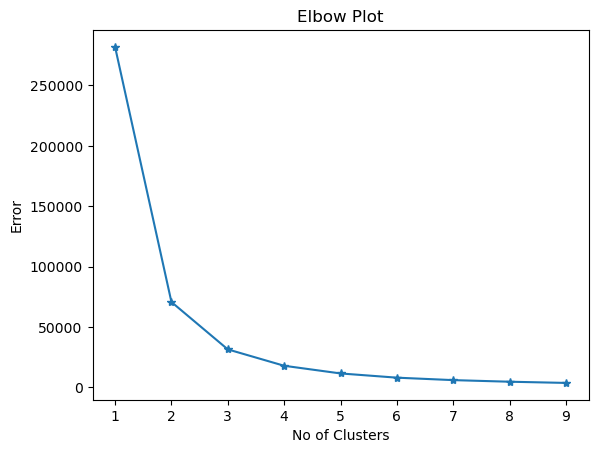

In [12]:
plt.plot(range(1,10),err,marker ='*')
plt.xlabel("No of Clusters")
plt.ylabel('Error')
plt.title("Elbow Plot")
plt.show()

In [13]:
# It is observed from the above plot that a bend is seen at 3
# The number of clusters can be 3 or greater than 3
# Let's check the Silhouette Score for the same

In [14]:
for i in range(3,10):
    model = KMeans(i)
    model.fit(data1)
    sil_score = silhouette_score(data1,model.labels_)
    print("Silhouette Score of ", i ,"clusters :",sil_score)

Silhouette Score of  3 clusters : 0.5821934246576435
Silhouette Score of  4 clusters : 0.5564924303093528
Silhouette Score of  5 clusters : 0.5405109783730785
Silhouette Score of  6 clusters : 0.5320804938969959
Silhouette Score of  7 clusters : 0.5200805575438783
Silhouette Score of  8 clusters : 0.5145479631436458
Silhouette Score of  9 clusters : 0.5089325274211277


In [15]:
# The Silhouette score is higher for 3 clusters
# The number of classes in our original data was also 3
# Let the number of clustrs be 3

In [16]:
km = KMeans(n_clusters= 3, random_state=10)
km.fit(data1)

KMeans(n_clusters=3, random_state=10)

In [17]:
data_k = data1.copy()
data_k['KMeans_Labels'] = km.labels_
data_k.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,KMeans_Labels
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
# The Labels column with 3 clusters has been attached to our dataset

### Agglomerative Clustering

In [19]:
# Plotting the dendrogram

single


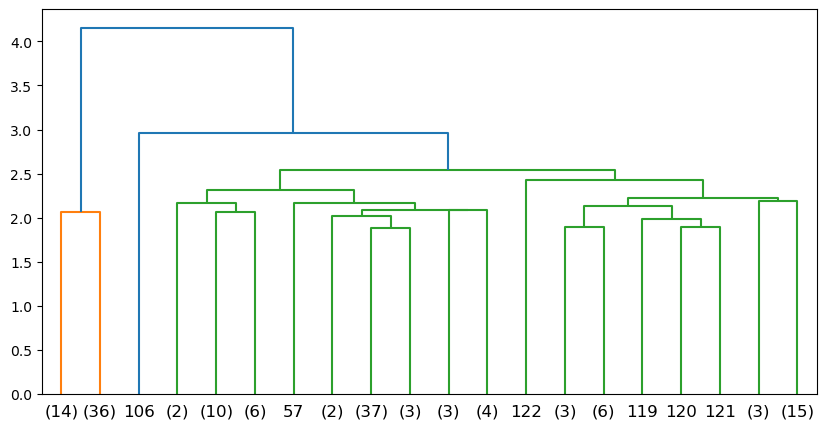

complete


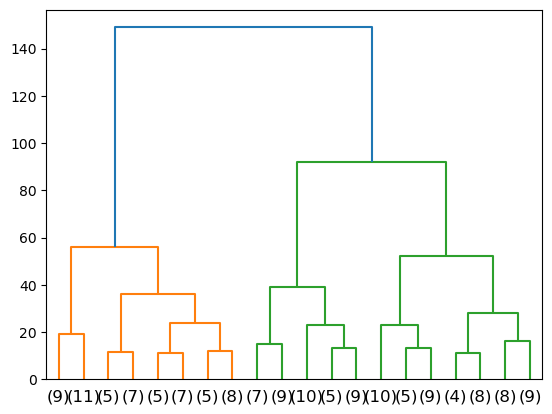

average


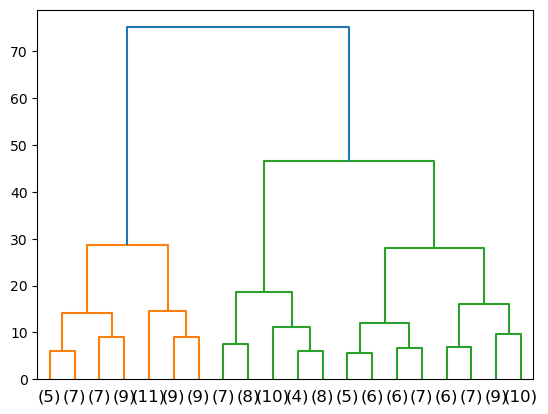

centroid


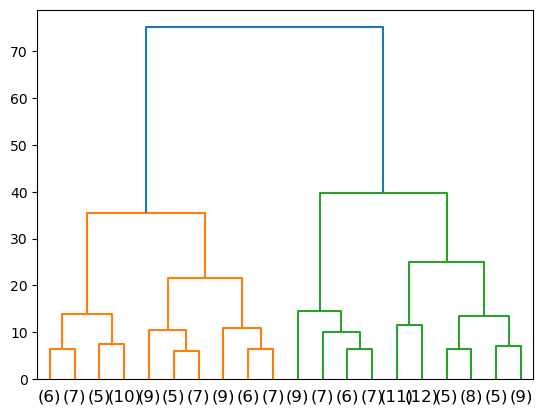

ward


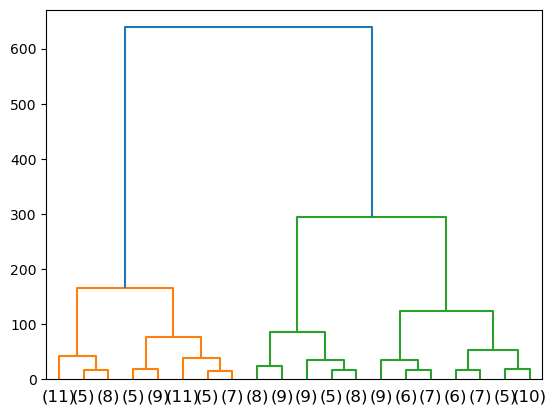

In [20]:
link = ['single','complete','average','centroid','ward']

plt.figure(figsize = (10,5))
for i in link:
    z = linkage(data1,method = i)
    dendrogram(z,truncate_mode='lastp',p = 20)
    print(i)
    plt.show()

In [21]:
# Finding the Linkage using Cophenet Value

In [22]:
link = ['single','complete','average','centroid','ward']
for i in link:
    z = linkage(data1,method = i)
    c,coph_dist = cophenet(z,pdist(data1))
    print("Cophentic value for",i,"is",c)

Cophentic value for single is 0.6931982577583717
Cophentic value for complete is 0.7392359704223432
Cophentic value for average is 0.7389490914829786
Cophentic value for centroid is 0.749809136641159
Cophentic value for ward is 0.739766235558485


In [23]:
# The Cophenet value for ward's is found to be higher compared to other linkages

# Silhouette score is used to find the Number of Clusters

In [24]:
for i in range(3,10):
    model = AgglomerativeClustering(i,linkage='ward')
    model.fit(data1)
    sil_score = silhouette_score(data1,model.labels_)
    print("Silhouette Score of ", i ,"clusters :",sil_score)

Silhouette Score of  3 clusters : 0.5538147372870975
Silhouette Score of  4 clusters : 0.5291801229596708
Silhouette Score of  5 clusters : 0.499430787499502
Silhouette Score of  6 clusters : 0.5136075839740722
Silhouette Score of  7 clusters : 0.4954464924758135
Silhouette Score of  8 clusters : 0.47684948346296874
Silhouette Score of  9 clusters : 0.4853989679110477


In [25]:
# Silhouette Score is higher for 3 clusters

# Let the n_clusters be 3

In [26]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(data1)

AgglomerativeClustering(n_clusters=3)

In [27]:
data_h = data1.copy()
data_h['Agg_Labels'] = agg.labels_
data_h.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Agg_Labels
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [28]:
# The column Labels with 3 clusters using Agglomerative clustering technique is attached to the dataset

In [29]:
# data           ----   Original dataset with Species column
# data_k         ----   Dataset using K-Means Clustering
# data_h         ----   Dataset using Agglomerative Clustering

In [30]:
# Comparison of the Original Data vs K-Means vs Agglomerative Clustering Technique

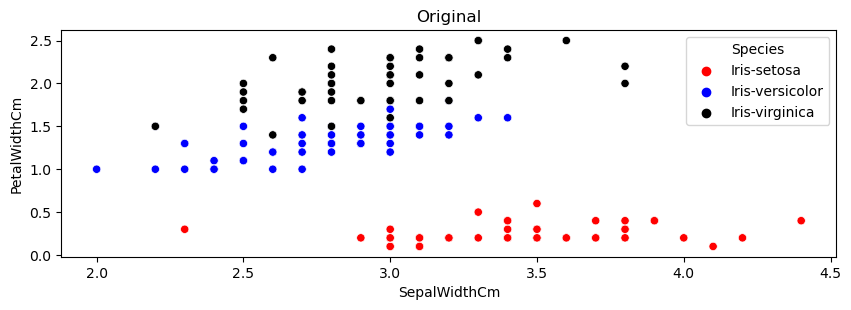

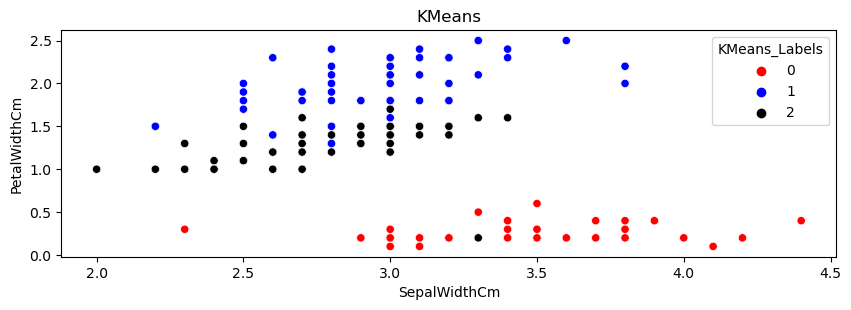

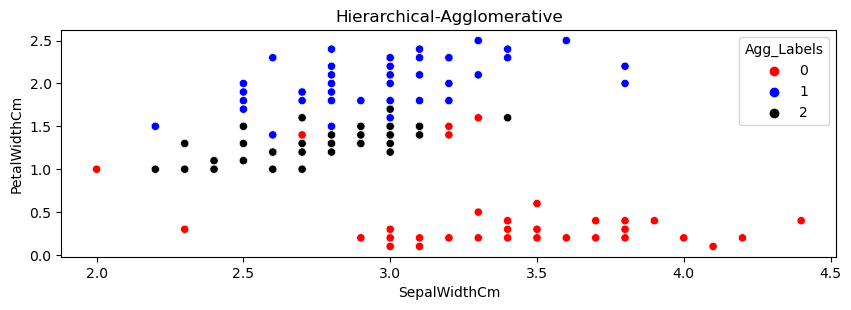

In [31]:
plt.figure(figsize = (10,10))
ax1 = plt.subplot(3,1,1)
plt.title("Original")
sns.scatterplot(x="SepalWidthCm",y="PetalWidthCm",data = data,hue = 'Species',palette=['Red','Blue','Black'],ax = ax1)
plt.show()
plt.figure(figsize = (10,10))
ax2 = plt.subplot(3,1,2)
plt.title("KMeans")
sns.scatterplot(x="SepalWidthCm",y="PetalWidthCm",data = data_k,hue = 'KMeans_Labels',palette=['Red','Blue','Black'],ax = ax2)
plt.show()
plt.figure(figsize = (10,10))
ax3 = plt.subplot(3,1,3)
plt.title("Hierarchical-Agglomerative")
sns.scatterplot(x="SepalWidthCm",y="PetalWidthCm",data = data_h,hue = 'Agg_Labels',palette=['Red','Blue','Black'],ax = ax3)
plt.show()

In [32]:
# I have plotted 2 columns - SepalWidth and PetalWidth
# In all the models, K-Means was found give better clusters compared to Agglomerative technique
# In both K-Means and Agglomerative :
    # Label 0 represents Iris-setosa
    # Label 1 represents Iris-virginica
    # Label 3 represents Iris-versicolor